In [2]:
# Copyright: European Synchrotron Radiation Facility, Grenoble, France
# Author: V. Valls
# License: MIT

In [8]:
%matplotlib nbagg

In [3]:
import numpy

In [44]:
def get_minmax_block(array, block_size):
    """Python code to compute min/max cache per block of an image"""
    if block_size == 0:
        return None
    size = numpy.array(array.shape)
    size = size // block_size + (size % block_size > 0)
    min_per_block = numpy.empty(size, dtype=array.dtype)
    max_per_block = numpy.empty(size, dtype=array.dtype)
    for y in range(size[0]):
        yend = (y + 1) * block_size + 1
        if yend > array.shape[0]:
            yy = slice(y * block_size, array.shape[0])
        else:
            yy = slice(y * block_size, yend)
        for x in range(size[1]):
            xend = (x + 1) * block_size + 1
            if xend > array.shape[1]:
                xx = slice(x * block_size, array.shape[1])
            else:
                xx = slice(x * block_size, xend)
            min_per_block[y, x] = numpy.min(array[yy, xx])
            max_per_block[y, x] = numpy.max(array[yy, xx])
    return (min_per_block, max_per_block, block_size)

In [45]:
a = numpy.arange(4*4)
a.shape = 4, 4
print("Input data")
print(a)
r = get_minmax_block(a, 2)
expected_min = numpy.array([[0, 2], [8, 10]])
expected_max = numpy.array([[10, 11], [14, 15]])
print("Min")
print(r[0])
print("Max")
print(r[1])
assert(numpy.allclose(r[0], expected_min))
assert(numpy.allclose(r[1], expected_max))

Input data
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
Min
[[ 0  2]
 [ 8 10]]
Max
[[10 11]
 [14 15]]


In [46]:
import os
import collections

ROOT = os.getcwd()
Problem = collections.namedtuple("Problem", ["image", "mask", "values", "complexity"])

def create_id22_17_problem():
    # Problem containing an image of 4096x4096 with 17 rings
    data = numpy.load(ROOT + "/data/id22_17.npz")
    image = data["tth"]
    mask = (data["mask"] != 0)
    values = data["angles"]
    return Problem(image, mask, values, None)

(array([[8.66508398e-01, 8.29240090e-01, 7.88856388e-01, 7.45102423e-01,
        6.97732932e-01, 6.46529050e-01, 5.91321055e-01, 5.32019002e-01,
        4.68651700e-01, 4.01417397e-01, 3.30755344e-01, 2.57481453e-01,
        1.83188689e-01, 1.12172542e-01, 6.53194606e-02, 6.43137229e-02],
       [8.65606265e-01, 8.28205834e-01, 7.87661984e-01, 7.43712317e-01,
        6.96101436e-01, 6.44596479e-01, 5.89007756e-01, 5.29215431e-01,
        4.65200782e-01, 3.97080216e-01, 3.25136608e-01, 2.49841912e-01,
        1.71862371e-01, 9.20404352e-02, 1.13510262e-02, 2.69300848e-05],
       [8.65632106e-01, 8.28239520e-01, 7.87705574e-01, 7.43768419e-01,
        6.96173397e-01, 6.44688652e-01, 5.89125883e-01, 5.29367312e-01,
        4.65397454e-01, 3.97338258e-01, 3.25483241e-01, 2.50328415e-01,
        1.72608695e-01, 9.34725707e-02, 1.99294189e-02, 1.63772666e-02],
       [8.67217538e-01, 8.30114927e-01, 7.89934732e-01, 7.46432158e-01,
        6.99375312e-01, 6.48563472e-01, 5.93852324e-01, 5.35

<IPython.core.display.Javascript object>


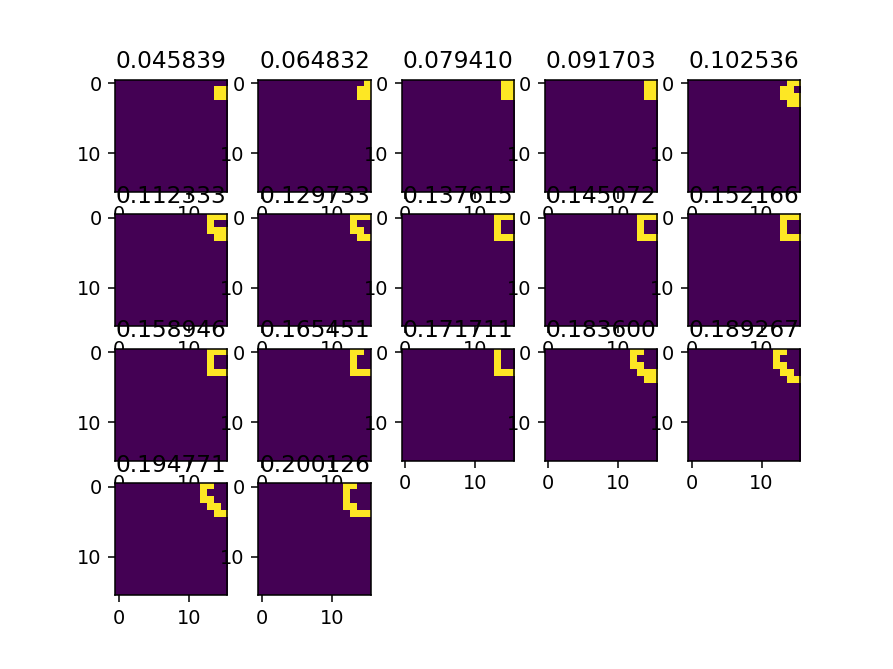

In [47]:
problem = create_id22_17_problem()
minmax = get_minmax_block(problem.image, 256)
print(minmax)

from matplotlib import pyplot
pyplot.figure()
for i, v in enumerate(problem.values):
    pyplot.subplot(len(problem.values) // 5 + 1, 5, i + 1)
    result = numpy.logical_and(minmax[0] < v, v < minmax[1])
    result = numpy.array(result, dtype=numpy.int8)
    pyplot.imshow(result)
    pyplot.title("%f" % v)
pyplot.show()

In [52]:
def get_minmax_block2(array, block_size):
    """Python code to compute min/max cache per block of an image"""
    if block_size == 0:
        return None

    size = numpy.array(array.shape)
    size = size // block_size + (size % block_size > 0)
    min_per_block = numpy.empty(size[0] * size[1], dtype=array.dtype)
    max_per_block = numpy.empty(size[0] * size[1], dtype=array.dtype)
    iblock = 0
    for y in range(size[0]):
        yend = (y + 1) * block_size + 1
        if y + 1 == size[0]:
            yy = slice(y * block_size, array.shape[0])
        else:
            yy = slice(y * block_size, yend)
        for x in range(size[1]):
            xend = (x + 1) * block_size + 1
            if x + 1 == size[1]:
                xx = slice(x * block_size, array.shape[1])
            else:
                xx = slice(x * block_size, xend)
            min_per_block[iblock] = numpy.min(array[yy, xx])
            max_per_block[iblock] = numpy.max(array[yy, xx])
            iblock += 1
    return (min_per_block, max_per_block, block_size)


problem = create_id22_17_problem()
minmax1 = get_minmax_block(problem.image, 256)
minmax2 = get_minmax_block2(problem.image, 256)

print(minmax1[0][0,0], minmax2[0][0])

print(numpy.allclose(minmax1[0].ravel(), minmax2[0]))
print(numpy.allclose(minmax1[1].ravel(), minmax2[1]))

0.8665083982193583 0.8665083982193583
True
True


In [1]:
%load_ext Cython

In [ ]:
%%cython --cplus --compile-args=-std=c++11 --compile-args=-fopenmp --link-args=-fopenmp --force -a


cdef class MinMax(object):

    cdef cnumpy.float32_t *_image_ptr
    cdef cnumpy.int8_t *_mask_ptr
    cdef int _dim_x
    cdef int _dim_y
    cdef int _group_size

    cdef cnumpy.float32_t *_min_cache
    cdef cnumpy.float32_t *_max_cache

    cdef void compute_minmax_block_omp(int x, int y, int index):
        cdef:
            int x, y
            int pos_x, dim_x, pos_y, dim_y
            float minimum, maximum, value
            float *image_ptr

        pos_x = x * self._group_size
        dim_x = pos_x + self._group_size
        if dim_x > self._dim_x:
            dim_x = self._dim_x
        pos_y = x * self._group_size
        dim_y = pos_y + self._group_size
        if dim_y > self._dim_y:
            dim_y = self._dim_y

        image_ptr = self._image_ptr[pos_y * self._dim_x + pos_x]
        minimum = image_ptr[0]
        maximum = minimum

        for y in range(pos_y, pos_y + dim_y):
            for x in range(pos_x, pos_x + dim_x):
                value = image_ptr[0]
                if value < minimum:
                    minimum = value
                if value < maximum:
                    maximum = value
        self._min_cache[index] = minimum
        self._max_cache[index] = maximum

    def get_minmax_block_omp(array, block_size):
    size = numpy.array(array.shape)
    size = size // block_size + (size % block_size > 0)
    min_per_block = numpy.empty(size[0] * size[1], dtype=array.dtype)
    max_per_block = numpy.empty(size[0] * size[1], dtype=array.dtype)
    iblock = 0
    for y in range(size[0]):
        yend = (y + 1) * block_size + 1
        if y + 1 == size[0]:
            yy = slice(y * block_size, array.shape[0])
        else:
            yy = slice(y * block_size, yend)
        for x in range(size[1]):
            xend = (x + 1) * block_size + 1
            if x + 1 == size[1]:
                xx = slice(x * block_size, array.shape[1])
            else:
                xx = slice(x * block_size, xend)
            min_per_block[iblock] = numpy.min(array[yy, xx])
            max_per_block[iblock] = numpy.max(array[yy, xx])
            iblock += 1
    return (min_per_block, max_per_block, block_size)

        
        

def get_minmax_block_omp(array, block_size):
    mm = MinMax(array)
    
    
    
    """Python code to compute min/max cache per block of an image"""
    if block_size == 0:
        return None

    size = numpy.array(array.shape)
    size = size // block_size + (size % block_size > 0)
    min_per_block = numpy.empty(size[0] * size[1], dtype=array.dtype)
    max_per_block = numpy.empty(size[0] * size[1], dtype=array.dtype)
    iblock = 0
    for y in range(size[0]):
        yend = (y + 1) * block_size + 1
        if y + 1 == size[0]:
            yy = slice(y * block_size, array.shape[0])
        else:
            yy = slice(y * block_size, yend)
        for x in range(size[1]):
            xend = (x + 1) * block_size + 1
            if x + 1 == size[1]:
                xx = slice(x * block_size, array.shape[1])
            else:
                xx = slice(x * block_size, xend)
            min_per_block[iblock] = numpy.min(array[yy, xx])
            max_per_block[iblock] = numpy.max(array[yy, xx])
            iblock += 1
    return (min_per_block, max_per_block, block_size)


problem = create_id22_17_problem()
minmax1 = get_minmax_block(problem.image, 256)
minmax2 = get_minmax_block2(problem.image, 256)

print(minmax1[0][0,0], minmax2[0][0])

print(numpy.allclose(minmax1[0].ravel(), minmax2[0]))
print(numpy.allclose(minmax1[1].ravel(), minmax2[1]))


